In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Input data has 2 directories: train and test each containing samples of benign and malignant skin cancer images.
<b> I will be not be loading libaries at the top, instead will be loading them as and when required for learning purposes </b>

## Loading basic libraries

In [3]:
# importing basic libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob ## glob is used to retrieve files 

# set seed
np.random.seed(21)

## Loading images and making training and test set

In [14]:
from PIL import Image

directory_benign_train = '../input/skin-cancer-malignant-vs-benign/train/benign'
directory_malignant_train = '../input/skin-cancer-malignant-vs-benign/train/malignant'
directory_benign_test = '../input/skin-cancer-malignant-vs-benign/test/benign'
directory_malignant_test = '../input/skin-cancer-malignant-vs-benign/test/malignant'

## Loading images and converting them to numpy array using their RGB value
read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))
# np.asarray converts the objects into array/list

# Loading train images
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]

# Loading test images
img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

#img_benign_train
type(img_benign_train)

list

In [15]:
# Converting list to numpy array for faster and more convenient operations going forward

X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

#### Note: Numpy array having the following advantages over a list:
<br>
1. Numpy array consume much less memory than lists.<br>
2. Numpy array can support a lot of mathematical operations that list cannot. Element wise operations are possible in np array but not in case of lists. (Np array contain only homogeneuos elements while lists can have heterogenous elements). Since they are homogeneous, it is much convenient to do calculations.<br> 
3. They can perform operations much faster as compared to lists.

<br><b>Detailed difference between numpy array and list found at: https://www.geeksforgeeks.org/python-lists-vs-numpy-arrays/ </b>

In [16]:
## Creating labels: benign is 0 and malignant is 1

y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
## Merge data to form complete training and test sets
# axis = 0 means rows

X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0) 
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape) # one image constitutes to (224, 224, 3) and we have 2637 total images in training set
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Shuffling Data

<br> Shuffling data is important since we want independence in our samples and don't want them to be affected by samples before and after. Since we don't know who created the dataset and if the dataset is sorted in any order, it is better to shuffle the training and test set to create independent points with minimal bias.
<br><br> Shuffling while generating epochs also ensures that the risk of creating batches that are not representative of the overall dataset is minimized 

In [25]:
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

In [29]:
print("Shuffle orders example: ", s1)

Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


## Displaying the first few images of training set

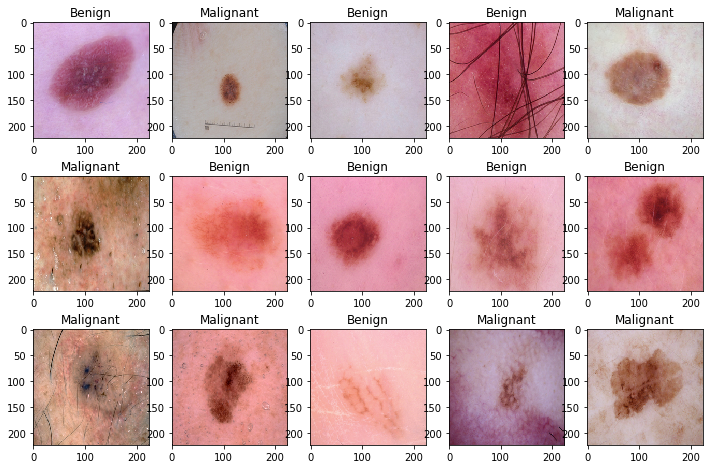

In [31]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

## References:

1. https://www.kaggle.com/fanconic/cnn-for-skin-cancer-detection
2. https://www.kaggle.com/rogeriovaz/skin-cancer-images-cnn-deep-learning/notebook
3. https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy